In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#url = 'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Classification/Seed_Data.csv'
url = 'https://raw.githubusercontent.com/iamchiragshekars/Machine-Learning/master/Classification/breast-cancer-wisconsin.csv'
dataset = pa.read_csv(url, error_bad_lines=False)
dataset = dataset.groupby(dataset.columns, axis = 1).transform(lambda x: x.fillna(0))
dataset['Bare Nuclei'] = dataset['Bare Nuclei'].replace(0,dataset['Bare Nuclei'].mean())

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.542799,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601872,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


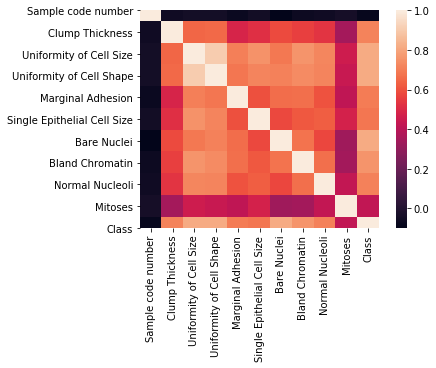

In [6]:
sns.heatmap(dataset.corr(), vmax=1, square=True)

In [7]:
dataset.corr()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.098488,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.587488,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686915,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.709660,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.665225,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581440,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.098488,0.587488,0.686915,0.709660,0.665225,0.581440,1.000000,0.675958,0.577378,0.338916,0.816284
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.675958,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.577378,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338916,0.344169,0.428336,1.000000,0.423170


In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train,y_train)
    
    train_accuracy[i] = knn.score(X_train,y_train)
    
    test_accuracy[i] = knn.score(X_test,y_test)
    

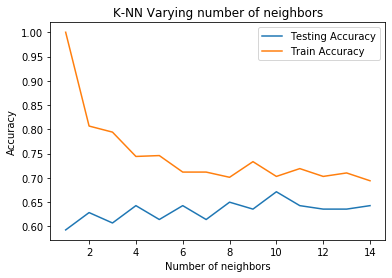

In [11]:
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 11]
 [39  9]]
              precision    recall  f1-score   support

           2       0.68      0.88      0.76        92
           4       0.45      0.19      0.26        48

    accuracy                           0.64       140
   macro avg       0.56      0.53      0.51       140
weighted avg       0.60      0.64      0.59       140

